In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold 
from sklearn import preprocessing
from numpy.fft import fft, ifft

# Dynamic Pressure

In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [3]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [5]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [6]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [8]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [9]:
df=Normal_DP
Cavdf=Cavitation_DP


In [10]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [11]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

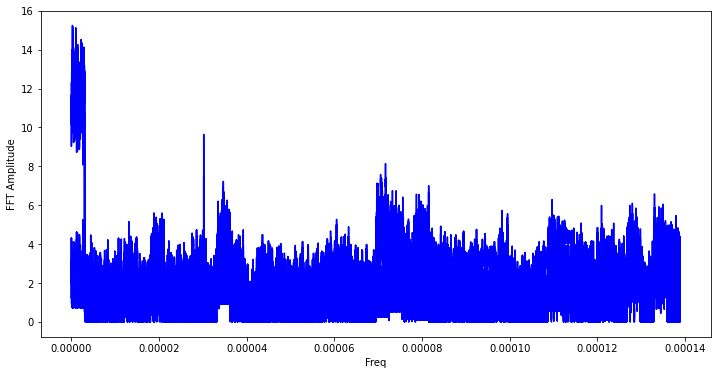

In [12]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [13]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

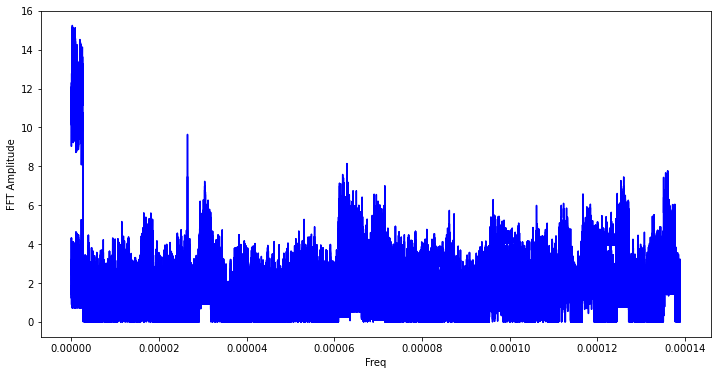

In [14]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [15]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [16]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])

In [17]:
X_train, X_test=train_test_split(X_Norm, test_size=0.3, random_state=1)


In [18]:
oneclass_SVM = OneClassSVM(kernel='rbf', gamma=0.3, nu=0.01)
oneclass_SVM.fit(X_train)

OneClassSVM(gamma=0.3, nu=0.01)

In [19]:
prediction= oneclass_SVM.predict(X_test)
score =0
for f in range (0,X_test.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_test.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 98.50%


In [20]:

prediction= oneclass_SVM.predict(X_cav)
score =0
for f in range (0,Cavdf.shape[0]): 
    if(prediction[f]==1):
        score=score+1

accuracy = score / Cavdf.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 77.56%


In [21]:
df_test=X_cav
df_test

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242
1,6.477165,0.816141,-0.389844,-0.389844,0.816141
2,6.314395,0.947824,-0.440142,-0.440142,0.947824
3,6.760710,0.586748,-0.302223,-0.302223,0.586748
4,5.886511,1.293990,-0.572366,-0.572366,1.293990
...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682


In [22]:
prediction = [1 if i==-1 else 0 for i in prediction]
df_test['y_test'] = score
df_test['prediction'] = prediction

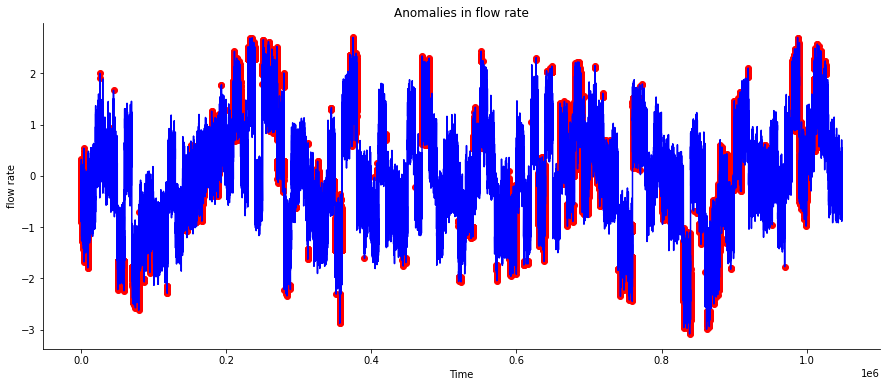

In [23]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Q  L/M']] #anomaly

ax.plot(df_test.index, df_test['Q  L/M'], color='blue')
ax.scatter(a.index, a['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in flow rate")
plt.xlabel("Time")
plt.ylabel("flow rate")
plt.show()

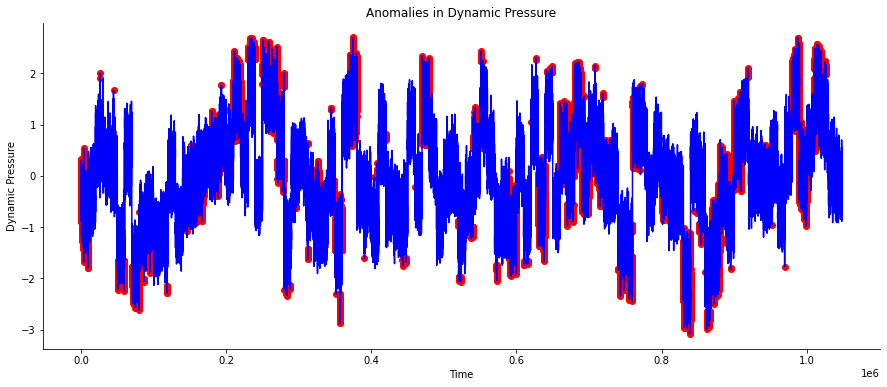

In [24]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Dynamic Pressure']] #anomaly

ax.plot(df_test.index, df_test['Dynamic Pressure'], color='blue')
ax.scatter(a.index, a['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

In [25]:
df_test_ANOMALY=df_test.loc[df_test['prediction']==1]

In [26]:
df_test_ANOMALY

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,y_test,prediction
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,813309,1
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,813309,1
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,813309,1
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,813309,1
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,813309,1
...,...,...,...,...,...,...,...
1026181,2.638302,-3.620957,2.022046,2.022046,-3.620957,813309,1
1026182,2.892936,-3.826960,2.100732,2.100732,-3.826960,813309,1
1026184,3.121406,-4.011796,2.171333,2.171333,-4.011796,813309,1
1026185,2.583154,-3.576341,2.005004,2.005004,-3.576341,813309,1


# Vibration

In [27]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [28]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [29]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [30]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [31]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [32]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [33]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [34]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [35]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [36]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

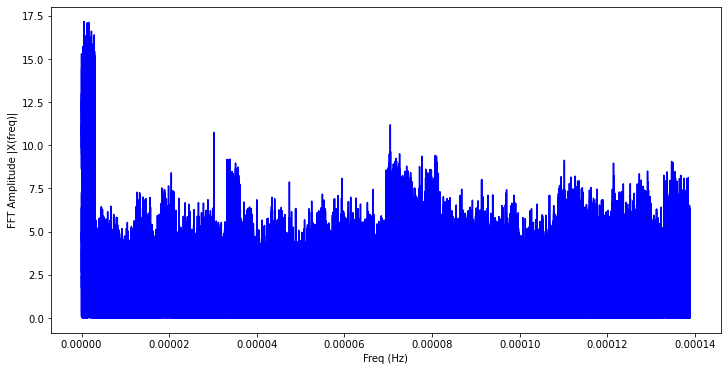

In [37]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [38]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

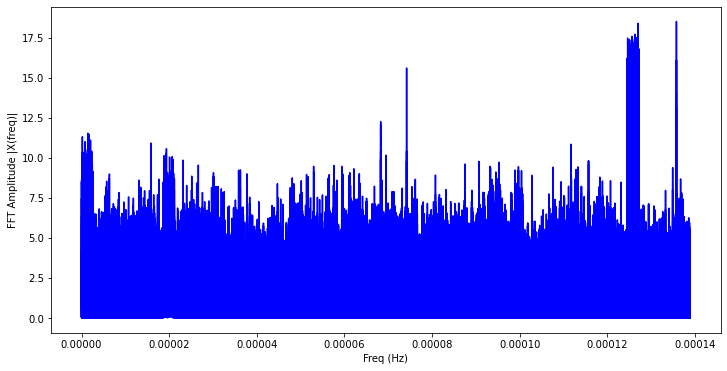

In [39]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_cav[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [40]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [41]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [42]:
X_train, X_test=train_test_split(X_Norm, test_size=0.3, random_state=1)


In [43]:
oneclass_SVM = OneClassSVM(kernel='rbf', gamma=0.3, nu=0.01)
oneclass_SVM.fit(X_train)

OneClassSVM(gamma=0.3, nu=0.01)

In [44]:
prediction= oneclass_SVM.predict(X_test)
score =0
for f in range (0,X_test.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_test.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 97.45%


In [45]:

prediction= oneclass_SVM.predict(X_cav)
score =0
for f in range (0,Cavdf.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / Cavdf.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 70.63%


In [46]:
df_test=X_cav

In [47]:
prediction = [1 if i==-1 else 0 for i in prediction]
df_test['y_test'] = score
df_test['prediction'] = prediction

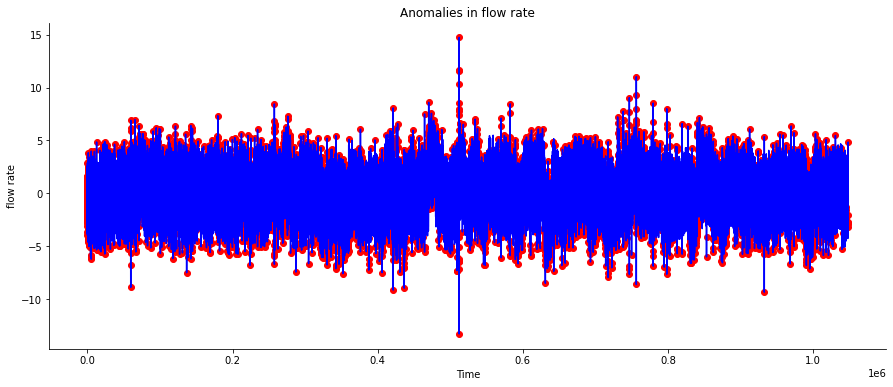

In [48]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Q  L/M']] #anomaly

ax.plot(df_test.index, df_test['Q  L/M'], color='blue')
ax.scatter(a.index, a['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in flow rate")
plt.xlabel("Time")
plt.ylabel("flow rate")
plt.show()

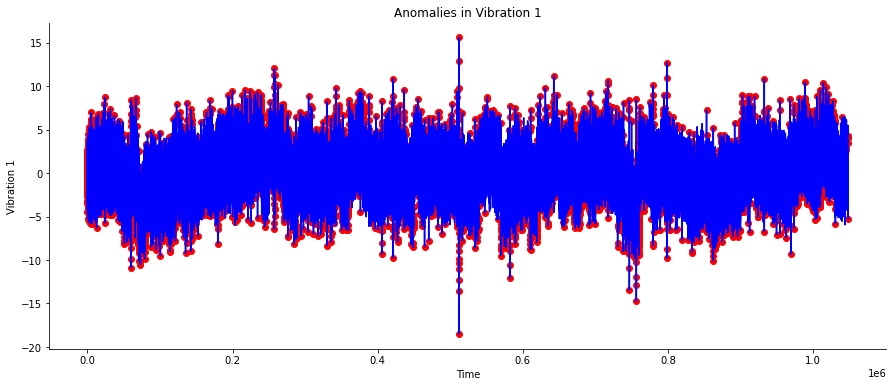

In [49]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Vibration 1']] #anomaly

ax.plot(df_test.index, df_test['Vibration 1'], color='blue')
ax.scatter(a.index, a['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

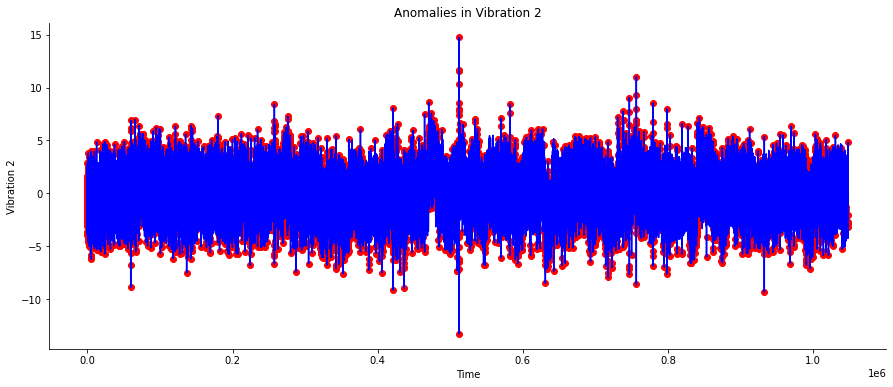

In [50]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Vibration 2']] #anomaly

ax.plot(df_test.index, df_test['Vibration 2'], color='blue')
ax.scatter(a.index, a['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

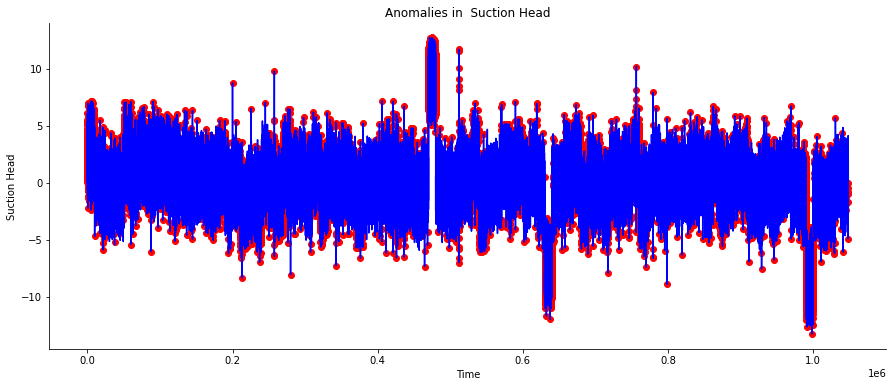

In [51]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['H']] #anomaly

ax.plot(df_test.index, df_test['H'], color='blue')
ax.scatter(a.index, a['H'], color='red')
sb.despine()
plt.title("Anomalies in  Suction Head")
plt.xlabel("Time")
plt.ylabel("Suction Head")
plt.show()

In [52]:
df_test_ANOMALY=df_test.loc[df_test['prediction']==1]

In [53]:
df_test_ANOMALY

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,y_test,prediction
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,740642,1
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,740642,1
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,740642,1
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,740642,1
5,7.078504,0.980561,0.831839,-1.907592,0.831839,0.980561,740642,1
...,...,...,...,...,...,...,...,...
1047917,1.327444,-0.022216,-3.170564,4.311540,-3.170564,-0.022216,740642,1
1047929,2.307022,-0.818740,-2.740146,4.064176,-2.740146,-0.818740,740642,1
1047961,2.535175,-0.950869,-2.800065,4.220119,-2.800065,-0.950869,740642,1
1048266,1.818785,-0.427174,-2.938373,4.165732,-2.938373,-0.427174,740642,1
